# Investigation of sold house price and neighborhood venues

## 1. Introdction

New York City (NYC) is known as one of the most expensive city in the world in terms of real estate prices. Not only New Yorkers are trying to buy their dream houses, NYC also attracts investors all over the world to their real estate market. There are many factors that are related to the sold house price, such as building age, number of units in the building, etc. This project will be focused on other relating factors from the neighborhood venue categories. More specifically, we will investigate what kinds of venues in a NYC neighborhood have correlation with the neighborhood property price. 

## 2. Data

In this project, we use the kaggle dataset of NYC Property Sales: https://www.kaggle.com/new-york-city/nyc-property-sales. This dataset contains properties sold in New York City over a 12-month period from September 2016 to September 2017, together with their borough and neighborhood information, among others. We will study the correlation between the neighborhood property price and the neighborhood venue categories. 

After downloading the kaggle dataset of NYC Property Sales at https://www.kaggle.com/new-york-city/nyc-property-sales/download: 

In [107]:
import pandas as pd # library for data analsysis
data = pd.read_csv("nyc-rolling-sales.csv")
# Renaming BOROUGHS
data['BOROUGH'][data['BOROUGH'] == 1] = 'Manhattan'
data['BOROUGH'][data['BOROUGH'] == 2] = 'Bronx'
data['BOROUGH'][data['BOROUGH'] == 3] = 'Brooklyn'
data['BOROUGH'][data['BOROUGH'] == 4] = 'Queens'
data['BOROUGH'][data['BOROUGH'] == 5] = 'Staten Island'

# Change the settings so that one can see all columns of the dataframe when calling df.head()
pd.set_option('display.max_columns',999)
data.head()

/Users/yuan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GR

There are 84548 entries with 22 data columns. In this project, we will mainly need the 3 columns "SALE PRICE", "BOROUGH", and "Neighborhood" for our study. 

In [109]:
#SALE PRICE is object but should be numeric
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null object
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GR

In [110]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000.0,2016-11-17 00:00:00


Then we can see that the "SALE PRICE" is numeric with some "NaN" values. 

Next, we check whether there are no duplicated rows. 

In [111]:
# Unnamed: 0 is an artifact from the data load and can be deleted
del data['Unnamed: 0']
sum(data.duplicated(data.columns))


765

There are 765 duplicates. Let's remove the

In [112]:
#Delete the duplicates and check that it worked
data = data.drop_duplicates(data.columns, keep='last')
sum(data.duplicated(data.columns))

0

We check the missing values in the 3 columns that we need. 

In [113]:
print(sum(data['NEIGHBORHOOD'].isnull()))
print(sum(data['BOROUGH'].isnull()))
print(sum(data['SALE PRICE'].isnull()))

0
0
14176


Let's drop all the rows where the price is missing. 

In [114]:
data.dropna(subset=['SALE PRICE'],inplace=True)
data.shape

(69607, 21)

Let's focus on the 3 following columns: 

In [115]:
data=data[['BOROUGH','NEIGHBORHOOD','SALE PRICE']]
data.describe(include='all')

,BOROUGH,NEIGHBORHOOD,SALE PRICE
count,69607,69607,6.960700e+04
unique,5,254,NaN
top,Brooklyn,FLUSHING-NORTH,NaN
freq,23843,2199,NaN
mean,NaN,NaN,1.280703e+06
std,NaN,NaN,1.143036e+07
min,NaN,NaN,0.000000e+00
25%,NaN,NaN,2.300000e+05
50%,NaN,NaN,5.330000e+05
75%,NaN,NaN,9.500000e+05


Data visualization: The distribution of price by boxplot. 

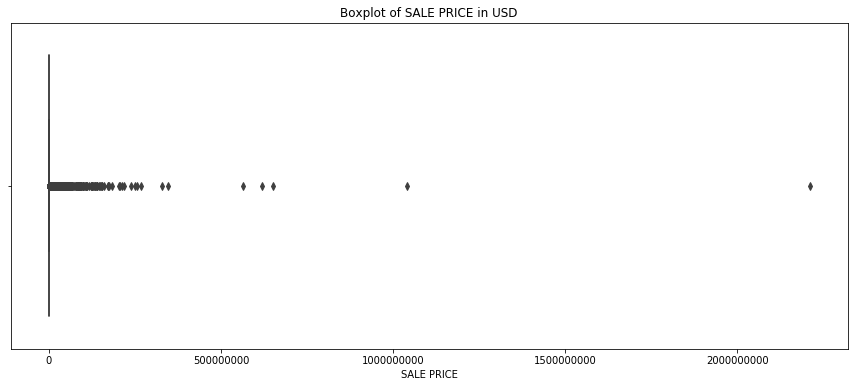

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

We include only the property sales between the following prices. 

In [119]:
# Remove observations that fall outside those caps
data = data[(data['SALE PRICE'] > 50000) & (data['SALE PRICE'] < 20000000)]
len(data)

57314

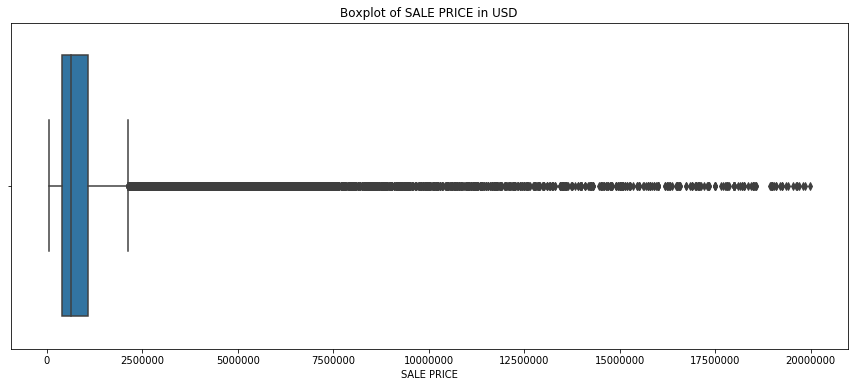

In [120]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=data)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

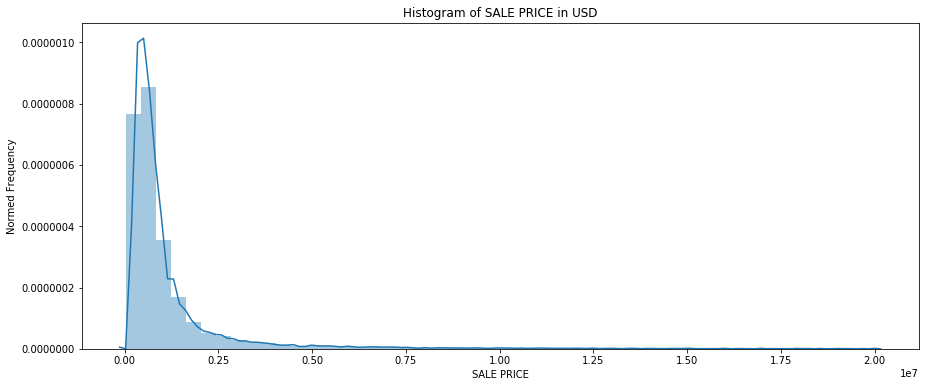

In [121]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(data['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

We look at the price distribution of the 5 boroughs: 

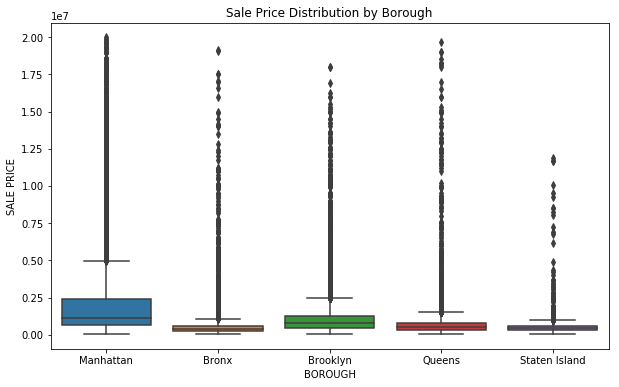

In [122]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=data)
plt.title('Sale Price Distribution by Borough')
plt.show()

We will focus our study on the most expensive borough: Manhattan. 

In [123]:
len(data[data['BOROUGH']=='Manhattan'])

13886